In [438]:
# 1. Download
# 2. Quick look
# 3. Check numerical data vs categorical data
# 4. Describe
# 5. 

In [439]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [440]:
train_df = pd.read_csv('./train.csv')

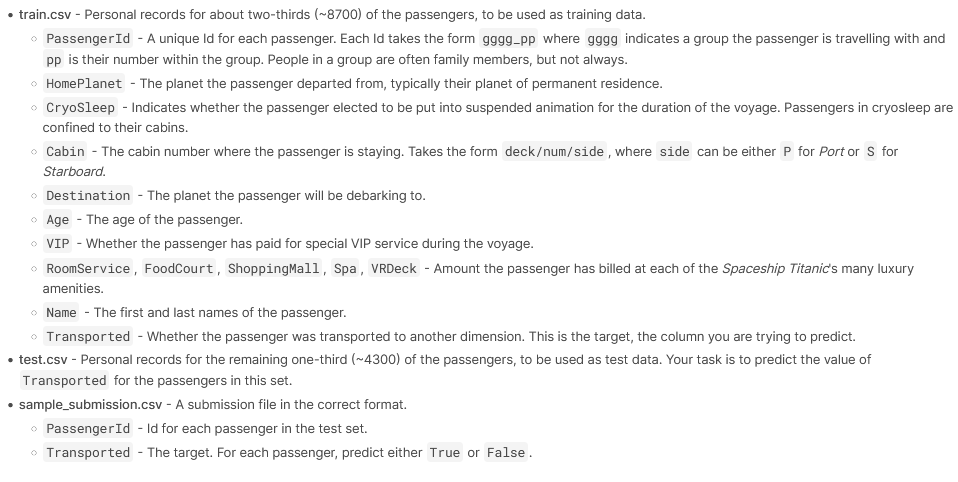

In [441]:
# Quick look at the dataset
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [442]:
# Describe dataset
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [443]:
train_df['Age'].value_counts().head()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
Name: Age, dtype: int64

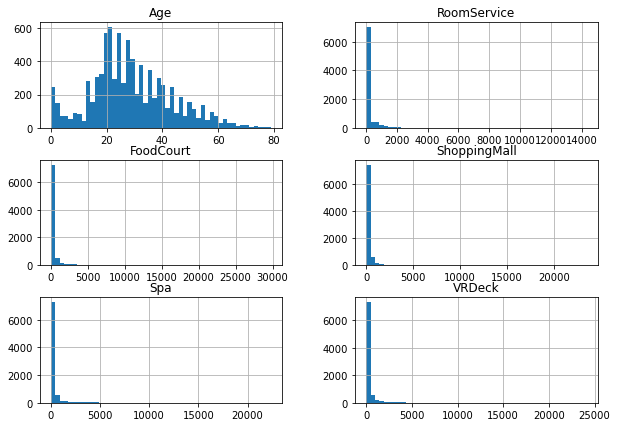

In [444]:
train_df.hist(bins=50, figsize=(10, 7))
plt.show()

<AxesSubplot:>

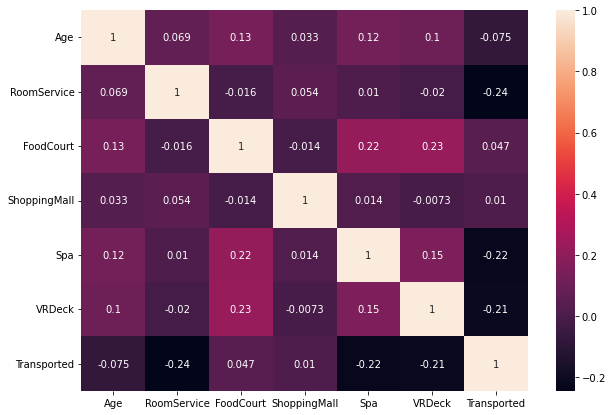

In [445]:
# See the correlation
plt.figure(figsize=(10,7))
sns.heatmap(train_df.corr(), annot=True)

In [446]:
corr_matrix = train_df.corr()
corr_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


## Fix missing values

In [447]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [448]:
train_df.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [449]:
# FIX: Age
train_df['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [450]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [451]:
train_df['Age'].describe()

count    8693.000000
mean       28.827930
std        14.339054
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [452]:
train_df['Age'].isna().any()

False

<AxesSubplot:>

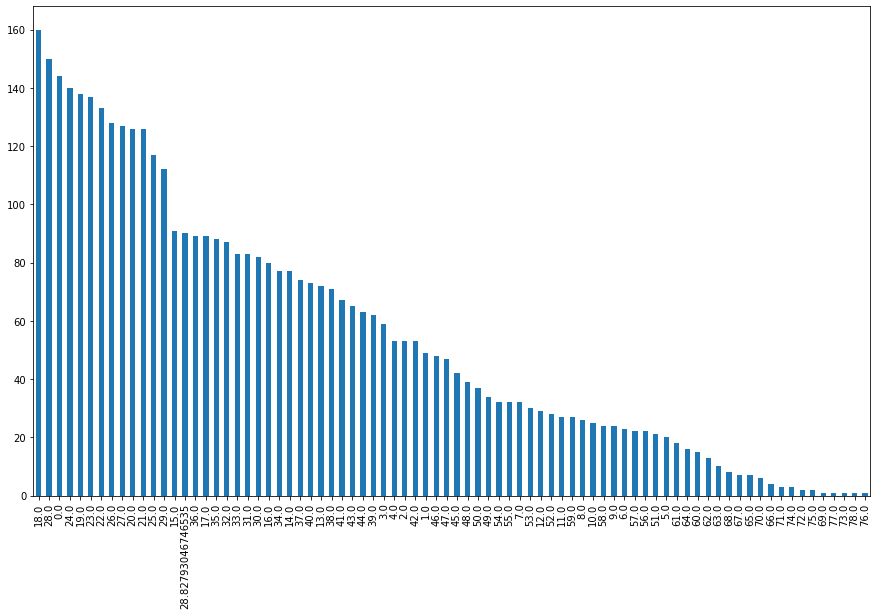

In [453]:
# Check at what age most of the passenger are transported
age_df = train_df[['Age', 'Transported']]
age_df['Age'][age_df['Transported']==True].value_counts().plot(kind='bar',figsize=(15,9))

In [454]:
# FIX : CryoSleep
train_df['CryoSleep'].describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

In [455]:
train_df['CryoSleep'] = train_df['CryoSleep'].map({True: 1, False: 0})

In [456]:
train_df['CryoSleep'].isna().any()

True

In [457]:
# Fix : VIP
train_df['VIP'].describe()

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object

In [458]:
train_df['VIP'] = train_df['VIP'].map({True: 1, False: 0})
train_df['VIP'].head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: VIP, dtype: float64

In [459]:
train_df = train_df.drop('Name', axis=1)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True


In [460]:
# FIX : Destination (ORDINAL)
train_df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [461]:
train_df[train_df['Cabin']=='G/981/S']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
5680,6030_01,Earth,0.0,G/981/S,TRAPPIST-1e,5.00000,0.0,0.0,0.0,0.0,0.0,0.0,True
5681,6030_02,Earth,1.0,G/981/S,TRAPPIST-1e,28.82793,0.0,0.0,0.0,0.0,0.0,0.0,True
5682,6030_03,Earth,0.0,G/981/S,TRAPPIST-1e,13.00000,0.0,852.0,147.0,7.0,0.0,1.0,True
5683,6030_04,Earth,0.0,G/981/S,TRAPPIST-1e,30.00000,0.0,0.0,0.0,47.0,703.0,4.0,True
5684,6030_05,Earth,1.0,G/981/S,TRAPPIST-1e,15.00000,0.0,0.0,0.0,NaN,0.0,0.0,True
5685,6030_06,Earth,1.0,G/981/S,TRAPPIST-1e,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,True
5686,6030_07,Earth,0.0,G/981/S,TRAPPIST-1e,49.00000,0.0,0.0,NaN,0.0,0.0,0.0,True


In [462]:
group1 = train_df.groupby('Cabin',as_index=False).agg({'Transported': 'sum'}).sort_values('Transported', ascending=False)
group1

,Cabin,Transported
6527,G/981/S,7
571,B/82/S,6
6472,G/943/S,6
801,C/230/S,6
654,C/137/S,6
...,...,...
3885,F/527/S,0
3886,F/528/S,0
1722,E/316/P,0
3888,F/53/P,0


In [463]:
# Drop Cabin
train_df = train_df.drop('Cabin', axis=1)
# train_df = train_df.drop('PassengerId', axis=1)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True


## HomePlanet

In [464]:
# Check Homeplanet & CryoSleep
train_df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [465]:
earth_df = train_df[train_df['HomePlanet'] == 'Earth']
europe_df = train_df[train_df['HomePlanet'] == 'Europa']
mars_df = train_df[train_df['HomePlanet'] == 'Mars']

<AxesSubplot:title={'center':'Earth'}>

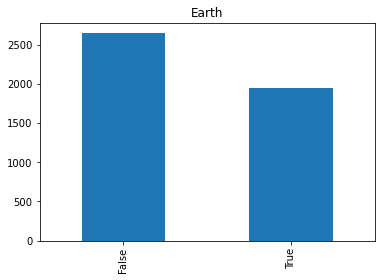

In [466]:
earth_df['Transported'].value_counts()
plt.title('Earth')
earth_df['Transported'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Europe'}>

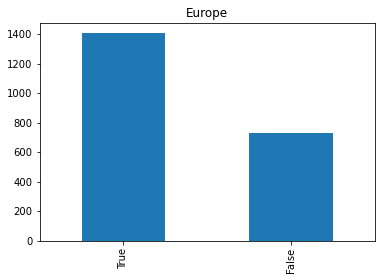

In [467]:
plt.title('Europe')
europe_df['Transported'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Mars'}>

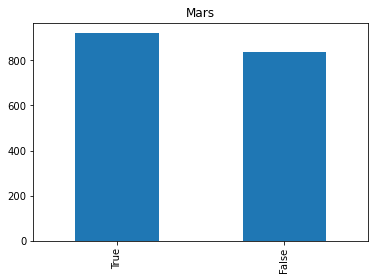

In [468]:
plt.title('Mars')
mars_df['Transported'].value_counts().plot(kind='bar')

## Encoder

In [469]:
# Encode to numeric
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [470]:
cat_train_df = train_df[['HomePlanet', 'Destination']]

cat_train_df_encode = ordinal_encoder.fit_transform(cat_train_df)

In [471]:
# train_df['HomePlanet'] = cat_train_df_encode[:, :1]

In [472]:
# train_df_encode = pd.get_dummies(train_df, drop_first=True)
# train_df_encode.head()

In [473]:
train_df['HomePlanet'].describe()


count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [474]:
train_df['Destination'].describe()

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

In [475]:
train_df_nums = train_df.select_dtypes(exclude='object')

train_df_objs = train_df.select_dtypes(include='object')

In [476]:
train_df_objs.head()

,PassengerId,HomePlanet,Destination
0,0001_01,Europa,TRAPPIST-1e
1,0002_01,Earth,TRAPPIST-1e
2,0003_01,Europa,TRAPPIST-1e
3,0003_02,Europa,TRAPPIST-1e
4,0004_01,Earth,TRAPPIST-1e


In [477]:
train_df_objs = train_df_objs.drop('PassengerId', axis=1)
train_df_objs = pd.get_dummies(train_df_objs, drop_first=False)

In [478]:
train_df_nums.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True


In [479]:
train_df_objs.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,1,0,0,0,1
1,1,0,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,1,0,0,0,0,1


In [480]:
# # See the correlation
# plt.figure(figsize=(10,7))
# sns.heatmap(train_df_objs.corr(), annot=True)

In [481]:
train_df = pd.concat([train_df_nums, train_df_objs], axis=1)
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1


In [482]:
train_df.isna().any()

CryoSleep                     True
Age                          False
VIP                           True
RoomService                   True
FoodCourt                     True
ShoppingMall                  True
Spa                           True
VRDeck                        True
Transported                  False
HomePlanet_Earth             False
HomePlanet_Europa            False
HomePlanet_Mars              False
Destination_55 Cancri e      False
Destination_PSO J318.5-22    False
Destination_TRAPPIST-1e      False
dtype: bool

In [483]:
train_df['CryoSleep'].value_counts()

0.0    5439
1.0    3037
Name: CryoSleep, dtype: int64

In [484]:
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(1)

In [485]:
train_df['VIP'] = train_df['VIP'].fillna(1)

In [486]:
train_df['RoomService'] = train_df['RoomService'].fillna(train_df['RoomService'].median())
train_df['FoodCourt'] = train_df['FoodCourt'].fillna(train_df['FoodCourt'].median())
train_df['ShoppingMall'] = train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].median())
train_df['Spa'] = train_df['Spa'].fillna(train_df['Spa'].median())
train_df['VRDeck'] = train_df['VRDeck'].fillna(train_df['VRDeck'].median())

In [487]:
train_df.isna().any()

CryoSleep                    False
Age                          False
VIP                          False
RoomService                  False
FoodCourt                    False
ShoppingMall                 False
Spa                          False
VRDeck                       False
Transported                  False
HomePlanet_Earth             False
HomePlanet_Europa            False
HomePlanet_Mars              False
Destination_55 Cancri e      False
Destination_PSO J318.5-22    False
Destination_TRAPPIST-1e      False
dtype: bool

In [488]:
# Dropped Roomservice, foodcourt, shoppingmall, spa, vrdeck
# train_df = train_df.drop(['RoomService', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck'], axis=1)
# train_df.head()

# Split Dataset into training and testing

In [489]:
from sklearn.model_selection import train_test_split

In [490]:
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [492]:
len(X_train), len(y_train), len(X_test), len(y_test)

(6085, 6085, 2608, 2608)

# SVM

In [546]:
from sklearn.svm import SVC

In [547]:
svc = SVC()

In [548]:
svc.fit(X_train, y_train)

SVC()

In [549]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [550]:
y_preds = svc.predict(X_test)

In [551]:
y_preds[:5], y_test[:5]

(array([False,  True,  True,  True,  True]),
 304      True
 2697    False
 8424    False
 1672     True
 8458     True
 Name: Transported, dtype: bool)

In [552]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.85      0.67      0.75      1289
        True       0.73      0.89      0.80      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608



C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


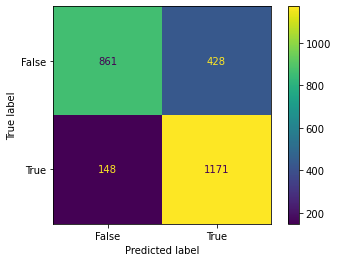

In [553]:
plot_confusion_matrix(svc, X_test, y_test)

In [554]:
svc.score(X_train,y_train)

0.7911257189811011

In [555]:
svc_score = print(accuracy_score(y_preds, y_test))

0.7791411042944786


# Decision Tree

In [556]:
from sklearn.tree import DecisionTreeClassifier

In [557]:
tree = DecisionTreeClassifier()

In [558]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [559]:
y_preds = tree.predict(X_test)

In [560]:
y_preds[:3], y_test[:3]

(array([False,  True,  True]),
 304      True
 2697    False
 8424    False
 Name: Transported, dtype: bool)

In [561]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.75      0.68      0.71      1289
        True       0.71      0.78      0.74      1319

    accuracy                           0.73      2608
   macro avg       0.73      0.73      0.73      2608
weighted avg       0.73      0.73      0.73      2608



C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


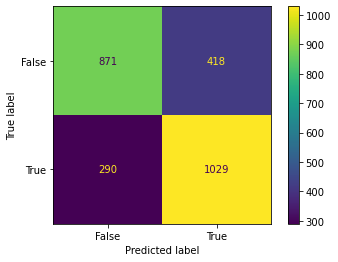

In [562]:
plot_confusion_matrix(tree, X_test, y_test)

In [563]:
tree_score = accuracy_score(y_test, y_preds)

In [564]:
print(tree.score(X_train, y_train))

0.9380443714050944


# Pruned Tree with Cross validation

In [565]:
for i in range(1, 10):
    pruned_tree = DecisionTreeClassifier(max_depth=i)
    pruned_tree.fit(X_train, y_train)
    y_preds = pruned_tree.predict(X_test)
    print(i, accuracy_score(y_test, y_preds))

1 0.7166411042944786
2 0.7212423312883436
3 0.7595858895705522
4 0.7664877300613497
5 0.7684049079754601
6 0.7753067484662577
7 0.7753067484662577
8 0.7806748466257669
9 0.7795245398773006


In [566]:
pruned_tree = DecisionTreeClassifier(max_depth=8)

In [568]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [571]:
pruned_tree.score(X_train, y_train)

0.8151191454396056

In [572]:
y_preds = pruned_tree.predict(X_test)
pruned_tree_score = accuracy_score(y_test, y_preds)

# Random Forest

In [573]:
from sklearn.ensemble import RandomForestClassifier

In [574]:
rfc = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [575]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [576]:
y_preds = rfc.predict(X_test)

In [577]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.77      0.78      0.78      1289
        True       0.78      0.77      0.78      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [578]:
rfc.score(X_train, y_train)

0.9242399342645851

In [579]:
rfc_score = accuracy_score(y_test, y_preds)

# Random Forest with Cross validation

In [580]:
for i in range(10, 20):
    rfc = RandomForestClassifier(n_estimators=i, max_features='auto', random_state=101)
    rfc.fit(X_train, y_train)
    y_preds = rfc.predict(X_test)
    print(accuracy_score(y_test, y_preds))

0.776457055214724
0.7753067484662577
0.7760736196319018
0.776457055214724
0.7753067484662577
0.7753067484662577
0.7787576687116564
0.7760736196319018
0.776840490797546
0.7756901840490797


In [581]:
rfc = RandomForestClassifier(n_estimators=16, max_features='auto', random_state=101)

In [582]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=16, random_state=101)

In [583]:
y_preds = rfc.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


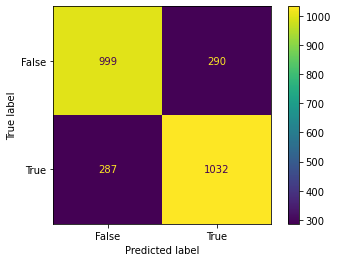

In [584]:
plot_confusion_matrix(rfc, X_test, y_test)

In [585]:
rfc.score(X_train, y_train)

0.9314708299096138

In [586]:
rfc_score_cross_val = accuracy_score(y_test, y_preds)

# Logistic Regression

In [587]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [588]:
y_preds = log.predict(X_test)

In [589]:
y_preds[:3], y_test[:3]

(array([False,  True,  True]),
 304      True
 2697    False
 8424    False
 Name: Transported, dtype: bool)

In [590]:
log_score = accuracy_score(y_preds, y_test)

In [591]:
print(log.score(X_train, y_train))

0.7883319638455217


# Ensemble

In [598]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('tree', pruned_tree), ('rf', rfc), ('svc', svc)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(max_depth=8)),
                             ('rf',
                              RandomForestClassifier(n_estimators=16,
                                                     random_state=101)),
                             ('svc', SVC())])

In [599]:
y_preds = voting_clf.predict(X_test)

In [600]:
voting_clf_score = accuracy_score(y_preds, y_test)

In [601]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.83      0.71      0.77      1289
        True       0.75      0.86      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


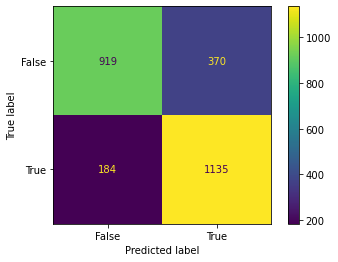

In [602]:
plot_confusion_matrix(voting_clf, X_test, y_test)

In [603]:
voting_clf.score(X_train, y_train)

0.8336894001643386

In [604]:
print(accuracy_score(y_test, y_preds))

0.7875766871165644


# Full Dataset

In [605]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1


# Test Dataset

In [689]:
test_df = pd.read_csv('./test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [690]:
# test_df = test_df.drop(['Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis=1)
# test_df.head()
test_df = test_df.drop(['Name', 'Cabin'], axis=1)

In [691]:
test_df['VIP'] = test_df['VIP'].map({True: 1, False: 0})
test_df['CryoSleep'] = test_df['CryoSleep'].map({True: 1, False: 0})

In [692]:
test_df_nums = test_df.select_dtypes(exclude='object')
test_df_objs = test_df.select_dtypes(include='object')

In [693]:
passenger_ids = test_df_objs['PassengerId']
test_df_objs = test_df_objs.drop('PassengerId', axis=1)
test_df_objs = pd.get_dummies(test_df_objs, drop_first=False)

In [694]:
test_df = pd.concat([test_df_nums, test_df_objs], axis=1)
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


In [695]:
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(1)
test_df['VIP'] = test_df['VIP'].fillna(1)
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [696]:
test_df.isna().any()

CryoSleep                    False
Age                          False
VIP                          False
RoomService                   True
FoodCourt                     True
ShoppingMall                  True
Spa                           True
VRDeck                        True
HomePlanet_Earth             False
HomePlanet_Europa            False
HomePlanet_Mars              False
Destination_55 Cancri e      False
Destination_PSO J318.5-22    False
Destination_TRAPPIST-1e      False
dtype: bool

In [697]:
test_df['RoomService'] = test_df['RoomService'].fillna(train_df['RoomService'].mean())
test_df['Spa'] = test_df['Spa'].fillna(train_df['Spa'].mean())
test_df['FoodCourt'] = test_df['FoodCourt'].fillna(train_df['FoodCourt'].mean())
test_df['VRDeck'] = test_df['VRDeck'].fillna(train_df['VRDeck'].mean())
test_df['ShoppingMall'] = test_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean())



In [698]:
test_df.isna().any()

CryoSleep                    False
Age                          False
VIP                          False
RoomService                  False
FoodCourt                    False
ShoppingMall                 False
Spa                          False
VRDeck                       False
HomePlanet_Earth             False
HomePlanet_Europa            False
HomePlanet_Mars              False
Destination_55 Cancri e      False
Destination_PSO J318.5-22    False
Destination_TRAPPIST-1e      False
dtype: bool

# Best Performing model

In [699]:
log_score

0.7753067484662577

In [700]:
rfc_score

0.776457055214724

In [701]:
rfc_score_cross_val

0.7787576687116564

In [702]:
voting_clf_score

0.7875766871165644

In [703]:
base_preds = voting_clf.predict(test_df)

In [706]:
final_df = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': base_preds})

In [707]:
final_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [709]:
final_df.to_csv('submission.csv', index=False)